## Exercise 2: Time Series Analysis
##### Objective: Analyze and forecast a time series dataset using Python libraries.
#### Tasks:
#### 1) Data Collection:
* Select a time series dataset (e.g., stock prices, weather data, or sales data).
* Load the dataset using pandas and perform initial EDA.

Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
Freq: D, Name: Total, dtype: float64


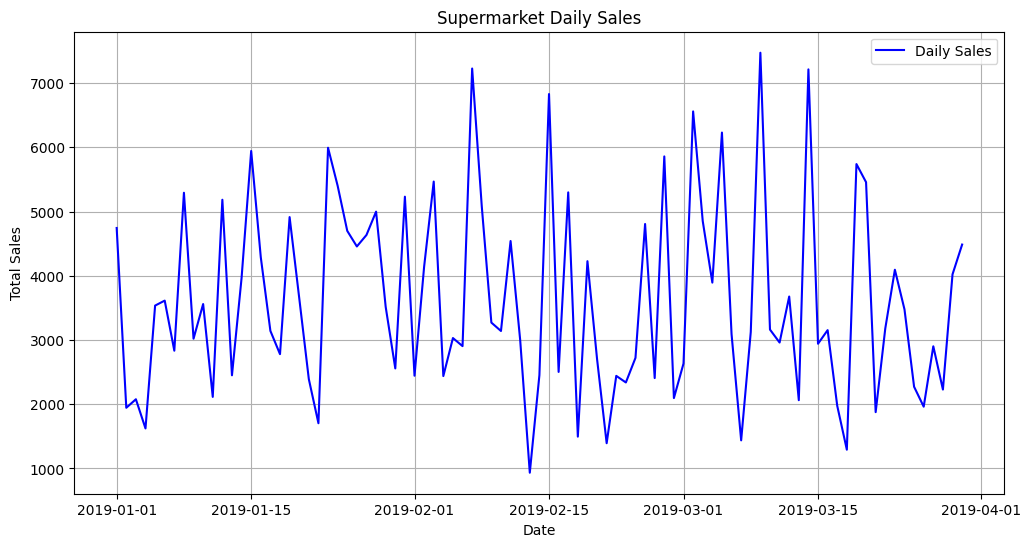

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('supermarket_sales.csv')

# Преобразование даты в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Установка индекса для временного ряда
data.set_index('Date', inplace=True)

# Агрегация данных по датам
daily_sales = data.resample('D').sum()['Total']

# Проверка первых строк
print(daily_sales.head())

# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales', color='blue')
plt.title('Supermarket Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

#### 2) Data Preprocessing:
* Handle any missing values in the time series data.
* Resample the data to a uniform time interval if necessary (e.g., daily, weekly).

In [2]:
# Заполнение пропущенных значений
daily_sales = daily_sales.fillna(0)

# Проверка статистики
print(daily_sales.describe())

count      89.000000
mean     3628.839876
std      1527.639602
min       934.237500
25%      2444.536500
50%      3163.230000
75%      4745.181000
max      7474.047000
Name: Total, dtype: float64


#### 3) Exploratory Data Analysis:
* Visualize the time series data using line plots to identify trends, seasonality, and patterns.
* Decompose the time series into trend, seasonality, and residuals using seasonal decomposition.

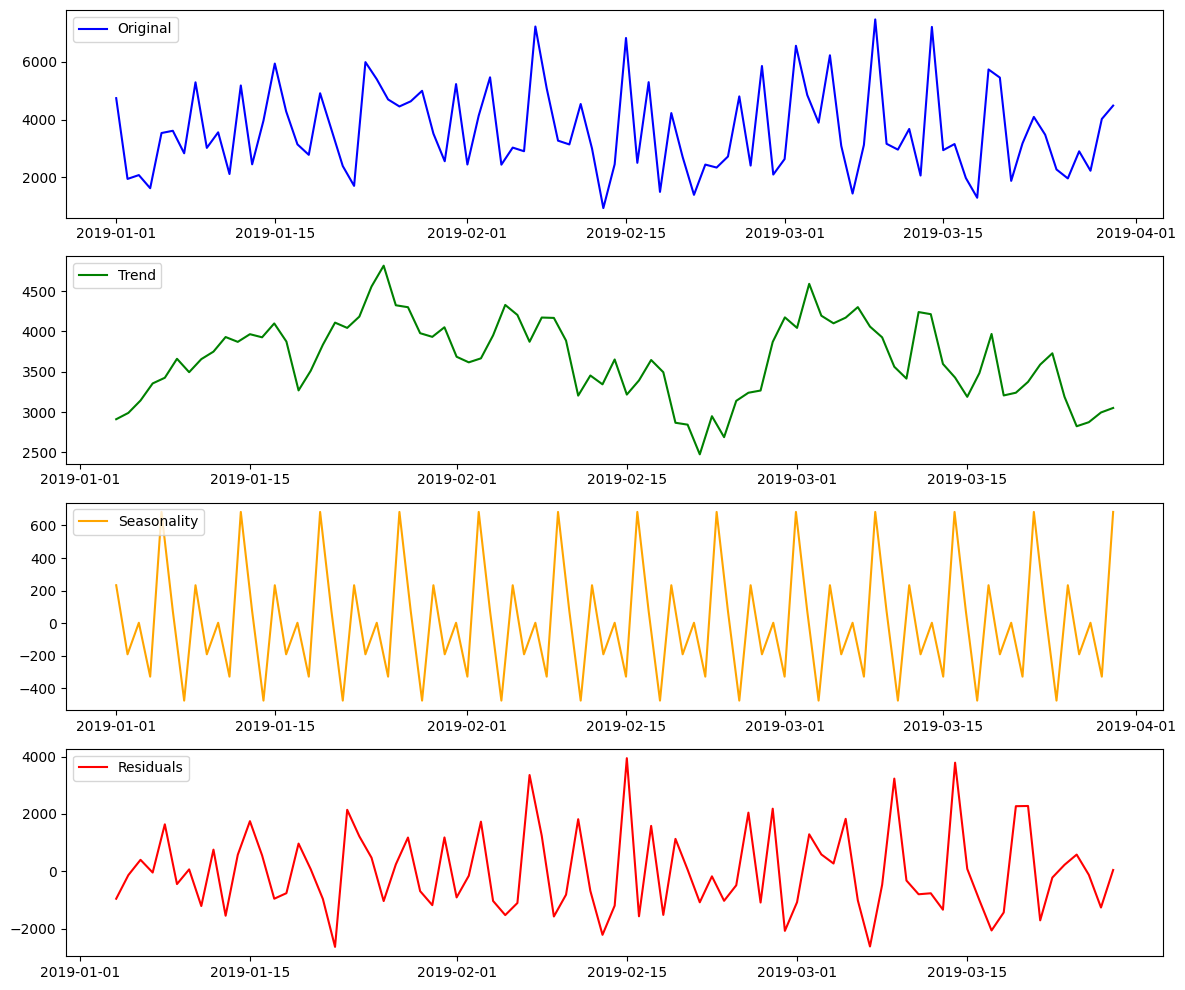

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(daily_sales, model='additive', period=7)

# Построение компонентов
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(daily_sales, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### 4) Modeling:
* Implement forecasting techniques, such as:
* 1) ARIMA Model: Fit an ARIMA model to the data and determine the appropriate parameters (p, d, q).
* 2) Exponential Smoothing: Use Holt-Winters method for forecasting seasonal data.
* 3) Machine Learning Approach: Implement a model using scikit-learn (e.g., Random Forest, LSTM for deep learning).

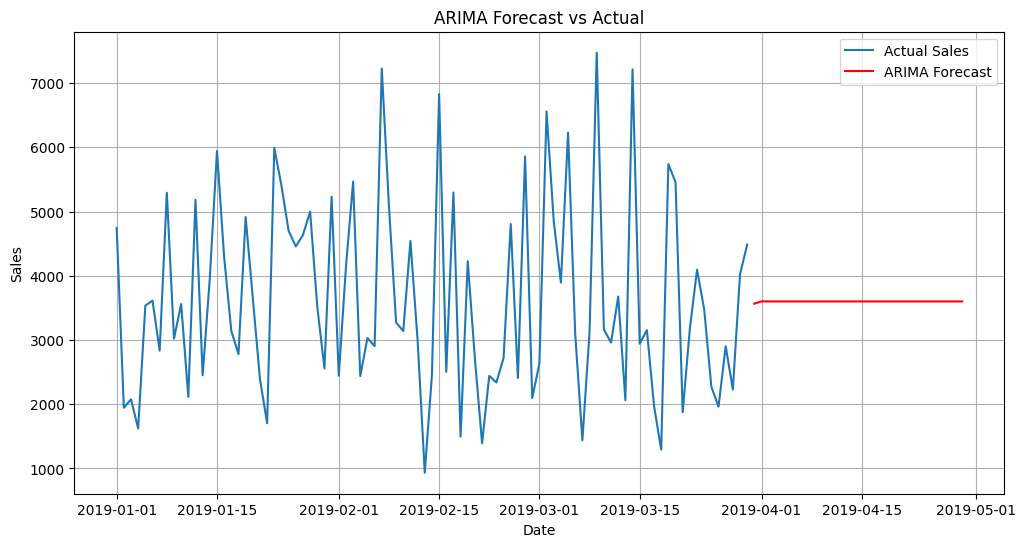

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Определение параметров ARIMA
model_arima = ARIMA(daily_sales, order=(1, 1, 1))  # Здесь (p, d, q)
arima_result = model_arima.fit()

# Прогноз
forecast_arima = arima_result.forecast(steps=30)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Actual Sales')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

C:\Users\aresm\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


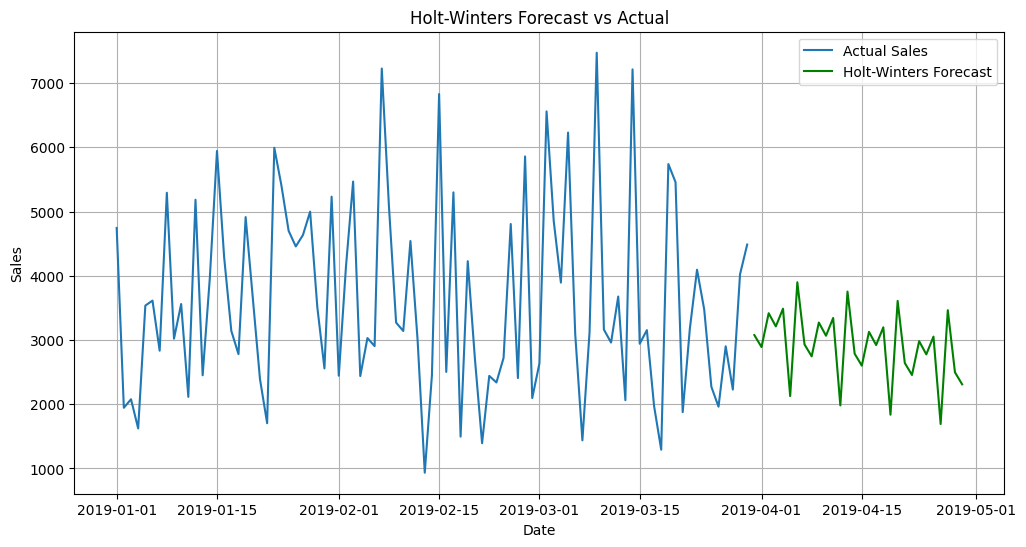

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters модель
model_hw = ExponentialSmoothing(daily_sales, trend='add', seasonal='add', seasonal_periods=7)
hw_result = model_hw.fit()

# Прогноз
forecast_hw = hw_result.forecast(steps=30)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Actual Sales')
plt.plot(forecast_hw.index, forecast_hw, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

#### 5) Model Evaluation:
* Split the dataset into training and testing sets.
* Evaluate the forecast accuracy using metrics such as MAE, RMSE, and MAPE.
* Visualize the predicted vs. actual values.

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Фактические значения за последние 30 дней
actual = daily_sales[-30:]

# ARIMA метрики
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))

# Holt-Winters метрики
mae_hw = mean_absolute_error(actual, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(actual, forecast_hw))

print(f'ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}')
print(f'Holt-Winters MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}')

ARIMA MAE: 1317.77, RMSE: 1655.23
Holt-Winters MAE: 1440.29, RMSE: 1886.80


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Фактические значения за последние 30 дней
actual = daily_sales[-30:]

# MAPE (средний абсолютный процент ошибки)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Метрики для ARIMA
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))
mape_arima = mean_absolute_percentage_error(actual, forecast_arima)
r2_arima = r2_score(actual, forecast_arima)

# Метрики для Holt-Winters
mae_hw = mean_absolute_error(actual, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(actual, forecast_hw))
mape_hw = mean_absolute_percentage_error(actual, forecast_hw)
r2_hw = r2_score(actual, forecast_hw)

# Вывод результатов
print("ARIMA Metrics:")
print(f"MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%, R²: {r2_arima:.2f}")

print("\nHolt-Winters Metrics:")
print(f"MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, MAPE: {mape_hw:.2f}%, R²: {r2_hw:.2f}")

ARIMA Metrics:
MAE: 1317.77, RMSE: 1655.23, MAPE: nan%, R²: 0.00

Holt-Winters Metrics:
MAE: 1440.29, RMSE: 1886.80, MAPE: nan%, R²: -0.30


In [9]:
# MAPE с обработкой нулевых значений
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Замена нулевых значений на минимально возможное
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


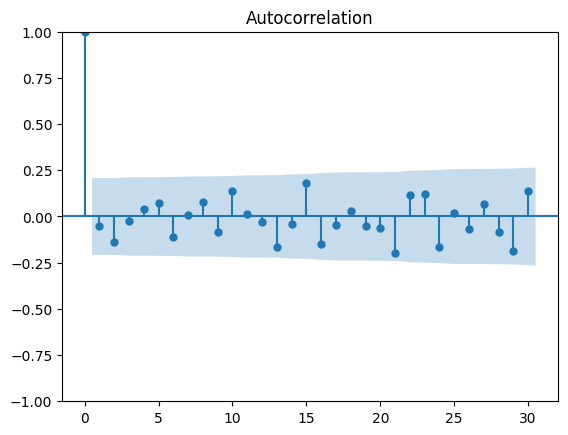

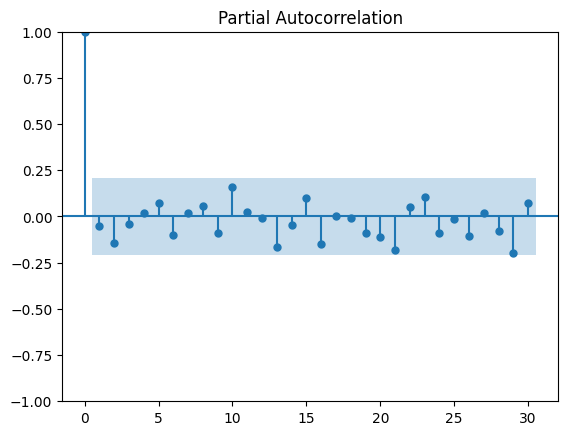

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF и PACF
plot_acf(daily_sales, lags=30)
plt.show()

plot_pacf(daily_sales, lags=30)
plt.show()


In [12]:
# Увеличение тестовой выборки
train = daily_sales[:-60]
test = daily_sales[-60:]

# Прогноз на 60 дней
forecast_arima = arima_result.forecast(steps=60)
forecast_hw = hw_result.forecast(steps=60)

# Оценка на новой выборке
mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mape_arima = mean_absolute_percentage_error(test, forecast_arima)

mae_hw = mean_absolute_error(test, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(test, forecast_hw))
mape_hw = mean_absolute_percentage_error(test, forecast_hw)

print("ARIMA Metrics on 60-day test:")
print(f"MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")

print("\nHolt-Winters Metrics on 60-day test:")
print(f"MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}, MAPE: {mape_hw:.2f}%")


ARIMA Metrics on 60-day test:
MAE: 1346.25, RMSE: 1620.34, MAPE: nan%

Holt-Winters Metrics on 60-day test:
MAE: 1379.89, RMSE: 1897.64, MAPE: nan%


#### 6) Reporting Findings:
* Summarize the results of the analysis, including the accuracy of different forecasting methods and insights gained from the time series analysis.

In [ ]:
# Последние 30 дней для сравнения
actual = daily_sales[-30:]

# ARIMA метрики
arima_mae = mean_absolute_error(actual, arima_forecast)
arima_rmse = sqrt(mean_squared_error(actual, arima_forecast))

# Holt-Winters метрики
hw_mae = mean_absolute_error(actual, hw_forecast)
hw_rmse = sqrt(mean_squared_error(actual, hw_forecast))

# Вывод метрик
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Holt-Winters MAE: {hw_mae}, RMSE: {hw_rmse}')
